# Preprocess

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.optimize import curve_fit

from IPython.display import clear_output

In [2]:
from Dude import PATH,rp , table, sp , create_network_data, pre_network, create_draw_params
from Dude import ps

In [3]:
%load_ext autoreload
%autoreload 2
clear_output()

# Workspace

In [4]:
rids = table.route_id.unique()
sids = table.stop_id.unique()

In [5]:
print(
    f"""
    Number of identical routes: {rids.size}
    Number of identical stops: {sids.size}
    """
)


    Number of identical routes: 353
    Number of identical stops: 5388
    


In [6]:
routes_with_stops = table.set_index(["route_id","stop_id"])

In [7]:
print(f"The stops in route id : {rids[0]}")
routes_with_stops.loc[rids[0],slice(None)]

The stops in route id : 0078


,stop_sequence,direction_id
stop_id,,
008569,0,0
F03291,1,0
F03403,2,0
F03402,3,0
F03400,4,0
...,...,...
F03201,24,0
F03209,25,0
F03154,26,0


# Link list of transport routes with visualization

In [8]:
# joining tables for visualization
snames = pd.read_csv(f"{PATH}{sp}.txt")
gdata = create_network_data(table,snames)
gdata['positions'] = list(zip(gdata.stop_lat, gdata.stop_lon))
pos = gdata.loc[:,["stop_name","positions"]].set_index("stop_name").positions.to_dict()

In [9]:
# Create data for network
df = pre_network(table,gdata)


In [10]:
G2 = nx.from_pandas_edgelist(df)

In [11]:
nsizes, colors = create_draw_params(gdata,table,G2,PATH,rp)

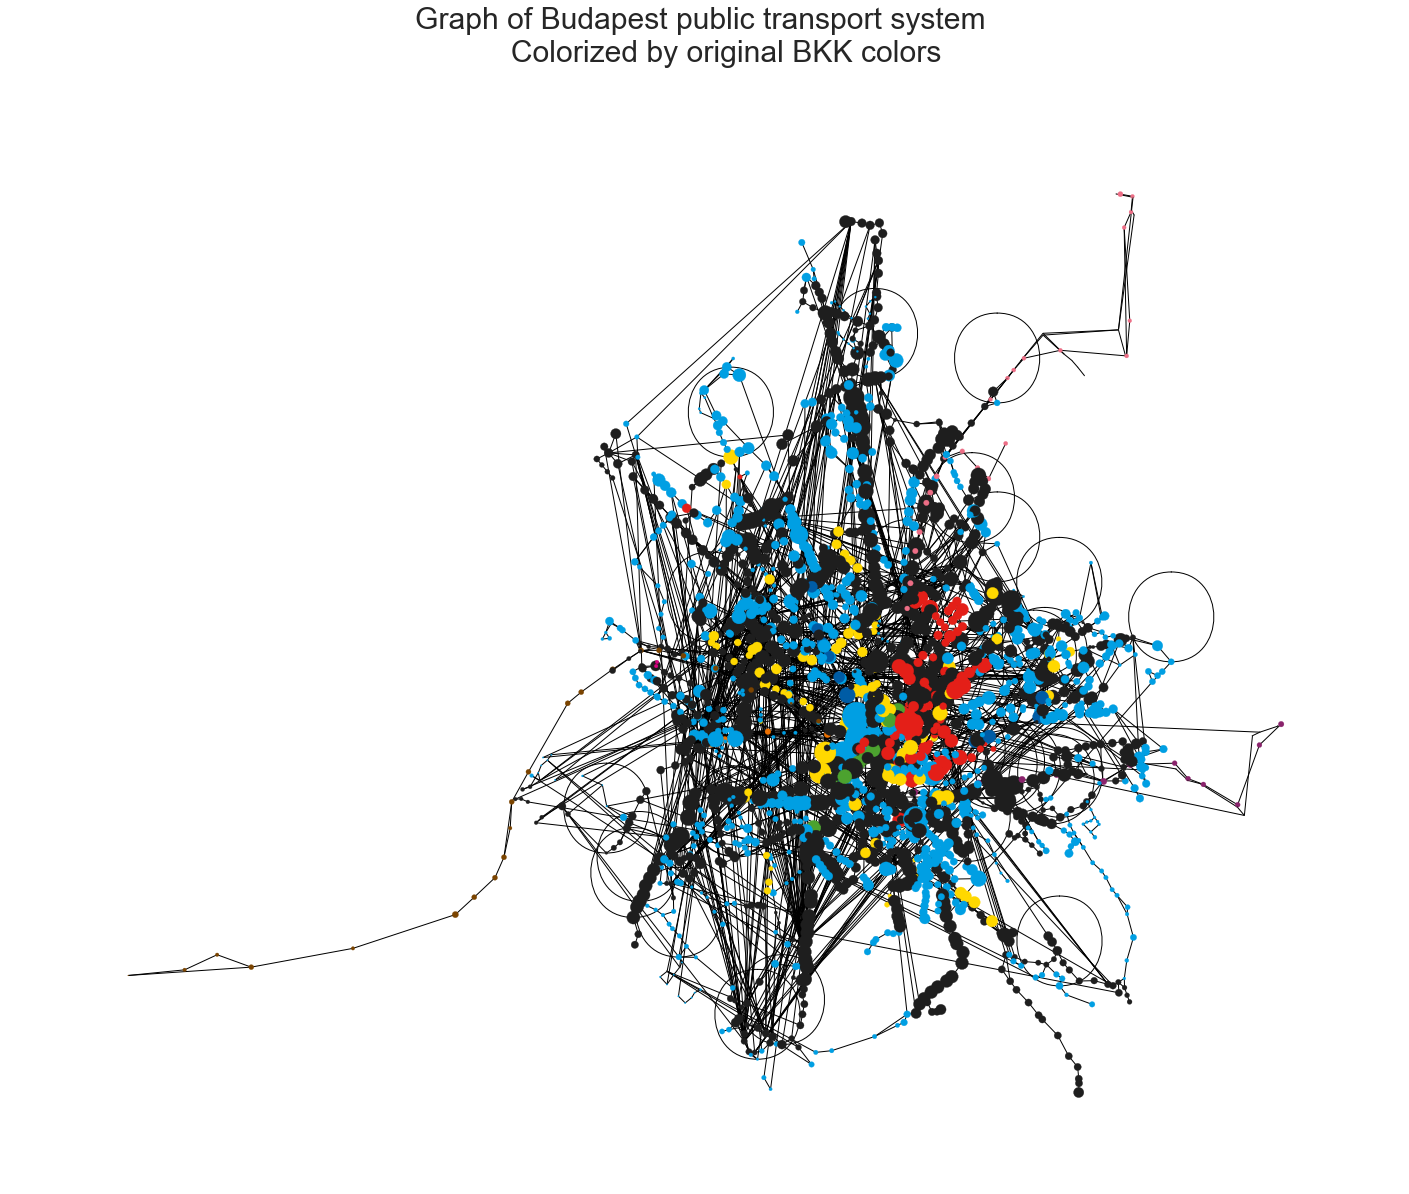

In [12]:
plt.figure(figsize=(25,20))
plt.title(
"""Graph of Budapest public transport system 
     Colorized by original BKK colors
""", size = 30)
nx.draw(
        G2,
        pos = pos
        ,node_size =nsizes/8
        ,node_color = colors
)

# Degree of distribution



The average degree of distribution is 3.2621




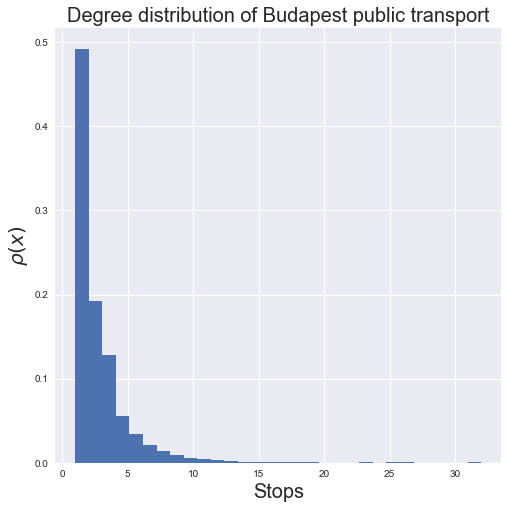

In [15]:
distr = [G2.degree(n) for n in G2.nodes()]
plt.hist(distr, bins = 30, density=True)
plt.title("Degree distribution of Budapest public transport")
plt.ylabel(r"$\rho(x)$")
plt.xlabel("Stops")
print(f"""

The average degree of distribution is {np.mean(distr):.4f}

""")

As we can see most of the stops are not busy, just normal bus or train stops. The number of nodes with many connection is not so large, so their probability density.



The average degree of distribution is 3.2621




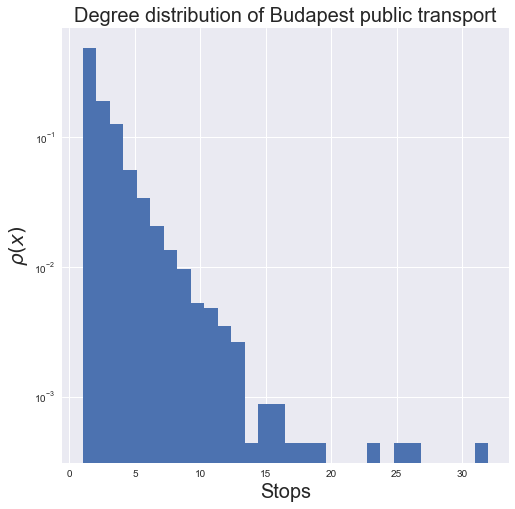

In [16]:
distr = [G2.degree(n) for n in G2.nodes()]
plt.hist(distr, bins = 30, density=True)
plt.yscale("log")
plt.title("Degree distribution of Budapest public transport")
plt.ylabel(r"$\rho(x)$")
plt.xlabel("Stops")
print(f"""

The average degree of distribution is {np.mean(distr):.4f}

""")

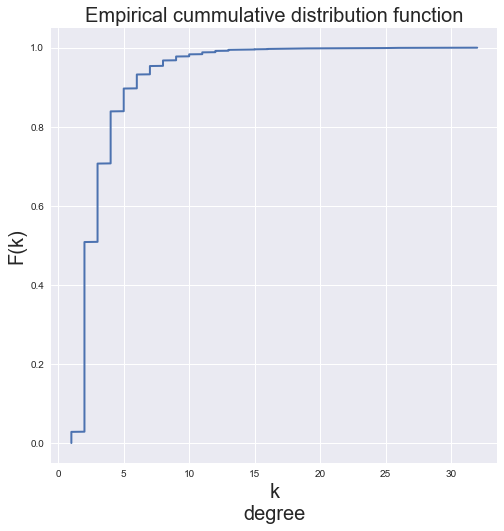

In [17]:
plt.plot(np.sort(distr),np.linspace(0,1,len(distr)))
plt.title("Empirical cummulative distribution function")
plt.xlabel("""k
degree""")
plt.ylabel("F(k)")
None


# Clustering coefficient

In [18]:
ntriangles = sum([ x for x in  nx.triangles(G2).values()])
numoftriplets = 0
# calculating the number of triples
for n in G2.nodes():
    for k in G2.neighbors(n):
        for m in G2.neighbors(k):
            if m != n:
                numoftriplets += 1

In [19]:

print(
    f"""
    The average clustering coefficient is: {
                nx.average_clustering(G2)
                                        :.4f}
    The global clustering coefficient is: {
        3*ntriangles/numoftriplets
    :.6f}
    """
)


    The average clustering coefficient is: 0.1311
    The global clustering coefficient is: 0.167666
    


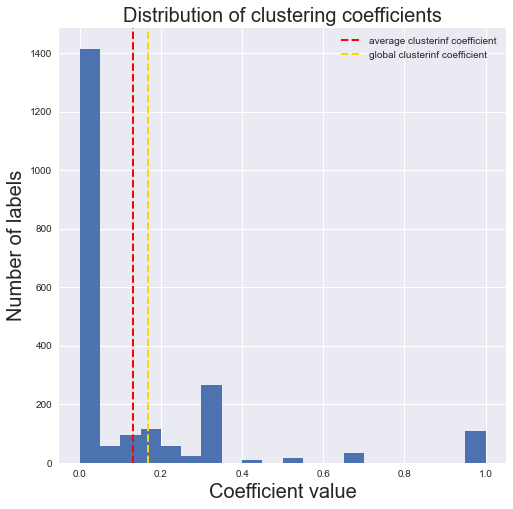

In [20]:
plt.title("Distribution of clustering coefficients")
plt.xlabel("Coefficient value")
plt.ylabel("Number of labels")
plt.hist(nx.clustering(G2).values(), bins= 20)
plt.axvline(nx.average_clustering(G2),color = "red",label = "average clusterinf coefficient",linestyle = "--")
plt.axvline(3*ntriangles/numoftriplets,color = "gold",label = "global clusterinf coefficient",linestyle = "--")
plt.legend()
None

# Degree of correlation

In [21]:
gtype = lambda x: "Assorative" if x > .5 else "Disassorative" 
deg = nx.degree_pearson_correlation_coefficient(G2)
print(
    f"""
    The assortavity of this graph is : {
                                        deg
                                        :.4f}
    That means, this graph is {gtype(deg)}.
    """
)
# This is the same as degree_assortativity_coefficient but uses the potentially faster scipy.stats.pearsonr function.
# From networkx documentation



    The assortavity of this graph is : 0.1273
    That means, this graph is Disassorative.
    
